# Using Multilayer Perception (MLP) on MNIST data
## Loading MNIST dataset and pre-processing

In [20]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [21]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [22]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [23]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [24]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## Build the MLP model

In [25]:
from keras.models import Sequential
from keras.layers import Dense

### Build the sequential model

In [26]:
model = Sequential()

### Add input and hidden layer

In [27]:
model.add(Dense(units=256, # Hidden Layer
                input_dim=784, # Pic: 28x28=784 pixels, Input Layer
                kernel_initializer='normal',
                activation='relu'))

### Add output layer

In [28]:
model.add(Dense(units=10, # Output layer
                # No need to put input_dim for this layer, since keras automatically finds the number of neurons in the last layer
                kernel_initializer='normal',
                activation='softmax'))

### Check the model summary

In [29]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

### Compile the settings like loss and optimizer for training

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Start the training process

In [31]:
train_history = model.fit(x=x_Train_normalize, # Features
                          y=y_Train_OneHot, # Labels
                          validation_split=0.2, # 80% of 60000 observations are assigned as training, 20% assigned as testing datasets
                          epochs=10, # Train times
                          batch_size=200, # 200 observations every batch. 48000/200=240 -> 240 batches to complete an epoch
                          verbose=2 # show the training process
                         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2183 - val_acc: 0.9407
Epoch 2/10
 - 1s - loss: 0.1910 - acc: 0.9455 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/10
 - 1s - loss: 0.1356 - acc: 0.9617 - val_loss: 0.1260 - val_acc: 0.9651
Epoch 4/10
 - 1s - loss: 0.1028 - acc: 0.9703 - val_loss: 0.1121 - val_acc: 0.9683
Epoch 5/10
 - 1s - loss: 0.0811 - acc: 0.9773 - val_loss: 0.0981 - val_acc: 0.9718
Epoch 6/10
 - 1s - loss: 0.0660 - acc: 0.9818 - val_loss: 0.0934 - val_acc: 0.9727
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9850 - val_loss: 0.0913 - val_acc: 0.9739
Epoch 8/10
 - 1s - loss: 0.0459 - acc: 0.9878 - val_loss: 0.0828 - val_acc: 0.9760
Epoch 9/10
 - 1s - loss: 0.0380 - acc: 0.9903 - val_loss: 0.0824 - val_acc: 0.9754
Epoch 10/10
 - 1s - loss: 0.0317 - acc: 0.9917 - val_loss: 0.0811 - val_acc: 0.9763


### Draw plot to show accuracy and loss from the training history

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

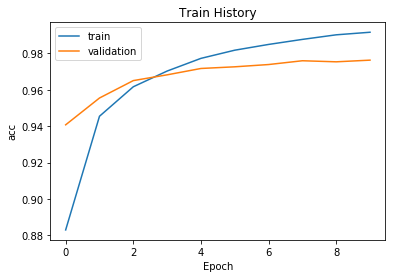

In [33]:
show_train_history(train_history, 'acc', 'val_acc')

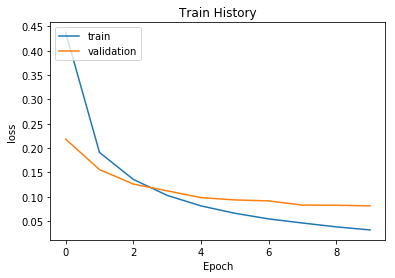

In [34]:
show_train_history(train_history, 'loss', 'val_loss')

### Evaluate the accuracy of the model

In [35]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 23us/step

accuracy= 0.9763


## Prediction

In [36]:
prediction = model.predict_classes(x_Test)

In [37]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

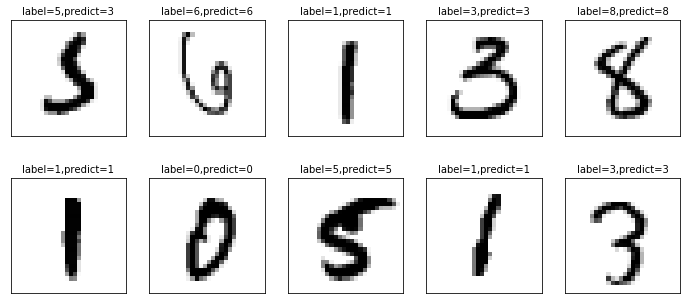

In [39]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

## Show the error matrix

In [40]:
import pandas as pd
pd.crosstab(y_test_label, prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1011,2,1,0,2,2,9,0
3,0,0,5,992,0,0,0,4,5,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,15,1,854,7,1,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,13,6,1,0,0,988,6,9
8,5,0,3,6,0,1,1,2,955,1


In [42]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})

### Show the mismatches where real label is 5 but prediction is 3

In [43]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


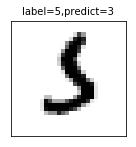

In [44]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=1)